In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("weather.csv")
df.shape

(165085, 4)

In [18]:
df.columns = ["ID", "Date", "Element", "Temp"]
df["Temp"] = (df["Temp"]/10)*1.8 + 32 #Convert from Celsius to Fahrenheit
df.head()

,ID,Date,Element,Temp
0,USW00094889,2014-11-12,TMAX,35.96
1,USC00208972,2009-04-29,TMIN,42.08
2,USC00200032,2008-05-26,TMAX,82.04
3,USC00205563,2005-11-11,TMAX,57.02
4,USC00200230,2014-02-27,TMAX,12.92


In [19]:
df.Date = pd.to_datetime(df.Date)
df.head()

,ID,Date,Element,Temp
0,USW00094889,2014-11-12,TMAX,35.96
1,USC00208972,2009-04-29,TMIN,42.08
2,USC00200032,2008-05-26,TMAX,82.04
3,USC00205563,2005-11-11,TMAX,57.02
4,USC00200230,2014-02-27,TMAX,12.92


In [20]:
df["month"] = df.Date.apply(lambda x: x.month) #extract month and day
df["day"] = df.Date.apply(lambda x: x.day)
df.head()

,ID,Date,Element,Temp,month,day
0,USW00094889,2014-11-12,TMAX,35.96,11,12
1,USC00208972,2009-04-29,TMIN,42.08,4,29
2,USC00200032,2008-05-26,TMAX,82.04,5,26
3,USC00205563,2005-11-11,TMAX,57.02,11,11
4,USC00200230,2014-02-27,TMAX,12.92,2,27


In [22]:
#remove leap year days, February 29
trim = df[~((df.month == 2) & (df.day == 29))]
trim.shape

(165002, 6)

In [29]:
#Create month-day column for grouping
trim["mday"] = trim.month.apply(lambda x: str(x)) + "-" + trim.day.apply(lambda x: str(x)) 
trim.head()

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,ID,Date,Element,Temp,month,day,mday,year
0,USW00094889,2014-11-12,TMAX,35.96,11,12,11-12,2014
1,USC00208972,2009-04-29,TMIN,42.08,4,29,4-29,2009
2,USC00200032,2008-05-26,TMAX,82.04,5,26,5-26,2008
3,USC00205563,2005-11-11,TMAX,57.02,11,11,11-11,2005
4,USC00200230,2014-02-27,TMAX,12.92,2,27,2-27,2014


In [30]:
trim["year"] = trim.Date.apply(lambda x: x.year)
trim.head()

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,ID,Date,Element,Temp,month,day,mday,year
0,USW00094889,2014-11-12,TMAX,35.96,11,12,11-12,2014
1,USC00208972,2009-04-29,TMIN,42.08,4,29,4-29,2009
2,USC00200032,2008-05-26,TMAX,82.04,5,26,5-26,2008
3,USC00205563,2005-11-11,TMAX,57.02,11,11,11-11,2005
4,USC00200230,2014-02-27,TMAX,12.92,2,27,2-27,2014


In [31]:
trim514 = trim[trim.year < 2015]
trim514.shape

(151245, 8)

In [35]:
gmday_max = trim514.groupby("mday")["Temp"].max()
gmday_min = trim514.groupby("mday")["Temp"].min()

In [71]:
gmday_max.index = gmday_max.index.to_datetime() #convert indices to datetime
gmday_min.index = gmday_min.index.to_datetime()
gmday_max = gmday_max.sort_index() #resort indices in chronological ordering
gmday_min = gmday_min.sort_index()
gmday_min.head()

2017-01-01     3.20
2017-01-02   -16.06
2017-01-03   -16.06
2017-01-04   -14.98
2017-01-05     5.00
Name: Temp, dtype: float64

In [56]:
df15 = trim[trim.year == 2015]
df15.shape

(13757, 8)

In [83]:
max15 = df15.groupby("mday")["Temp"].max()
min15 = df15.groupby("mday")["Temp"].min()
max15.index = pd.to_datetime(max15.index)
min15.index = pd.to_datetime(min15.index)
max15 = max15.sort_index()
min15 = min15.sort_index()
max15.head()

2017-01-01    33.98
2017-01-02    39.02
2017-01-03    39.02
2017-01-04    39.92
2017-01-05    37.04
Name: Temp, dtype: float64

In [84]:
#Record low/high set in 2015
print "Days where minimum low record is broken:", sum(min15 < gmday_min)
print "Days where maximum high record is broken:", sum(max15 > gmday_max)

Days where minimum low record is broken: 32
Days where maximum high record is broken: 37


In [85]:
new_lows = min15[min15 < gmday_min]
new_highs = max15[max15 > gmday_max]

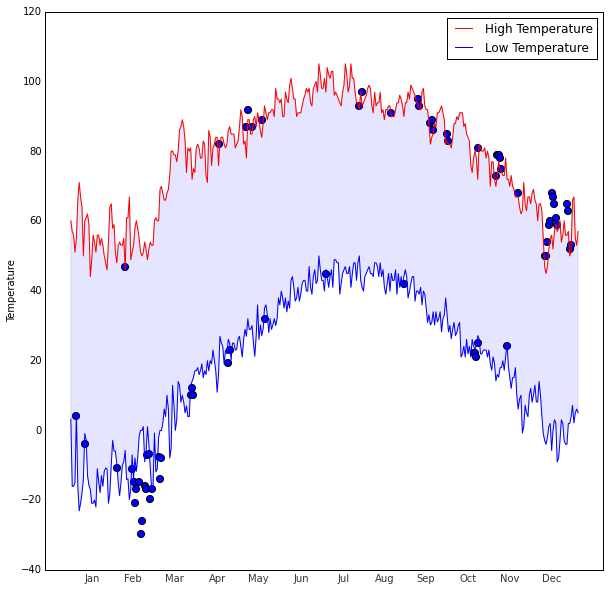

In [105]:
#Dots on plot indicate where high/low temperatures in 2015 exceed prior 10-year period high/low
plt.figure(figsize=(10, 10))
plt.scatter((new_lows.index - pd.Timestamp("2017-01-01")).astype("timedelta64[D]"), new_lows.values, s=50)
plt.plot(gmday_max, label = "High Temperature", c="r")
pos = np.arange(15, 405, 30)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(pos, months, alpha=0.8)
plt.tick_params(left="off", bottom="off", top="off", right='off')
plt.plot(gmday_min, label = "Low Temperature", c="b")
plt.scatter((new_highs.index - pd.Timestamp("2017-01-01")).astype("timedelta64[D]"), new_highs.values, s=50)
plt.gca().fill_between(range(len(gmday_max)), gmday_min, gmday_max, alpha = 0.1)
plt.ylabel("Temperature")
plt.legend()